In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [2]:
CG_API_KEY='1cd87fc66b6d4db0866e936b8d2dedfc'
url = "http://open-api.coinglass.com/api/pro/v1/futures/openInterest/chart"
params = {'interval':0, 'symbol':'BTC'}
headers = {'coinglassSecret': CG_API_KEY}
response_cg = requests.get(url, headers=headers, params=params)
cg_oi_df=pd.read_json(response_cg.text)
cg_oi_df.head()
#cg_oi_df.loc[0,'data']

,code,msg,data,success
dataMap,0,success,"{'Binance': [161745430, 181309262, 180784983, ...",True
dateList,0,success,"[1582848000000, 1582934400000, 1583020800000, ...",True
priceList,0,success,"[8803.5, 8713.5, 8543.5, 8534.4, 8910.08, 8754...",True


In [3]:
url="https://open-api.coinglass.com/api/pro/v1/futures/funding_rates_chart"
params={'symbol':'BTC'}
headers = {'coinglassSecret': CG_API_KEY}
response_cg_fr = requests.get(url, headers=headers, params=params)
cg_fr_df=pd.read_json(response_cg_fr.text)
cg_fr_df.head()

,code,msg,data,success
dataMap,0,success,"{'Bitmex': [-0.0339, -0.1181, -0.1259, -0.0635...",True
dateList,0,success,"[1629244800000, 1629273600000, 1629302400000, ...",True
frDataMap,0,success,"{'Bitmex': [-0.0886, -0.0466, -0.0985, -0.1105...",True
priceList,0,success,"[45730.9, 44647.7, 44978.3, 45830.3, 44720.6, ...",True


<BarContainer object of 540 artists>

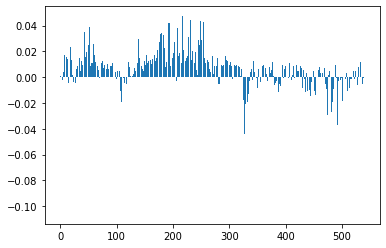

In [4]:
oi_dict=cg_oi_df.loc['dataMap','data']
ois=[i for i in list(oi_dict.values())]
ois_df=pd.DataFrame(ois).T
ois_total=ois_df.sum(axis=1)
#this is oi value over all. try an get # of contracts, funding rate from coinglass. would be cool

fr_dict=cg_fr_df.loc['frDataMap','data'] #dataMap ou frDataMap?
frs=[i for i in list(fr_dict.values())]
frs_df=pd.DataFrame(frs).T
frs_total=frs_df.mean(axis=1)
plt.bar(range(len(frs_total)),frs_total)

Text(0, 0.5, 'total OI value (coinglass)')

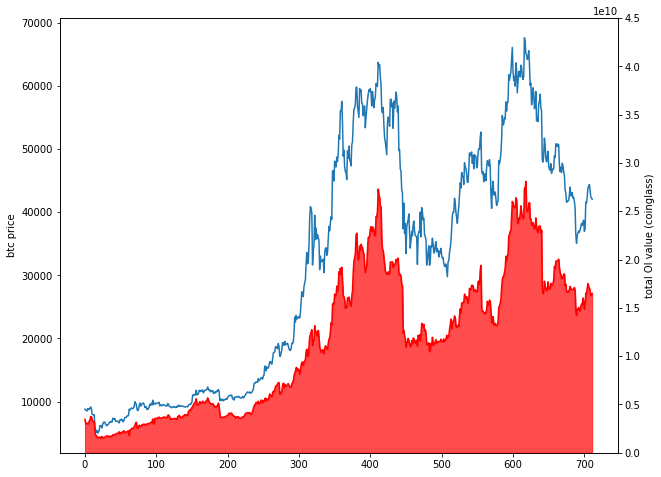

In [5]:
btc_price=cg_oi_df.loc['priceList','data']
L=range(len(btc_price))
f,ax=plt.subplots(figsize=(10,8))
ax.plot(L,btc_price)
ax.set_ylabel('btc price')
ax2=ax.twinx()
ax2.plot(L,ois_total,c='red')
ax2.set_ylim(0,4.5e10)
ax2.fill_between(L,ois_total,color='red',alpha=0.7)
ax2.set_ylabel('total OI value (coinglass)')